## H2O-3 AutoML Tutorial

[**1C. Introduction to Machine Learning with H2O-3 - AutoML**](https://training.h2o.ai/products/1c-introduction-to-machine-learning-with-h2o-3-automl)に沿ったチュートリアル

[**H2O 3 - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)  
[**Python - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/index.html)

- [Initial Setup](#InitialSetup)
    - パッケージのインポート
    - H2Oクラスターの開始
    - データのロード
- [Start Experiment](#StartExperiment)
    - データの確認
    - 学習(train)/テスト(test)データセットへの分割
- [H2O AutoML Classification](#AutoMLClassification)
    - XXX
    - XXX

***

<a id='InitialSetup'></a>
### Initial Setup

In [2]:
import h2o
import matplotlib as plt
%matplotlib inline
from h2o.automl import H2OAutoML

In [3]:
#> H2Oクラスターの開始
h2o.init(url='http://localhost:54321')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_261"; Java(TM) SE Runtime Environment (build 1.8.0_261-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.261-b12, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/h2o_3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp106cem11
  JVM stdout: /tmp/tmp106cem11/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmp106cem11/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_ec2_user_dj3xqd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.399 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
#> データのロード
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/H2O-3-Tutorials/loan_level_50k.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


***

<a id='StartExperiment'></a>
### Start Experiment

In [5]:
#> 各変数のサマリ
loan_level.describe()

Rows:49930
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199902.0,,202404.0,10180.0,0.0,1.0,,6.0,1.0,10000.0,6.0,5.0,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.3066000684786,200025.67422391332,,203023.39707590628,30705.25866529917,7.7196095038559225,1.0281994792709797,,76.08864765261981,32.83933763635989,136369.677548568,75.74523823829837,7.185977708792306,,,,,,55401.43412250129,NaN,,359.8508311636291,1.6294507784479138,,,,
maxs,830.0,200403.0,,203312.0,49740.0,50.0,4.0,,160.0,65.0,529000.0,100.0,10.625,,,,,,99900.0,NaN,,361.0,2.0,,,,
sigma,54.97355321804357,109.77460105152075,,110.47953133302413,11363.124822676407,12.042273590466614,0.21962330364819396,,15.06208012347409,11.165383364972822,60632.743281235904,14.867228331350553,0.5835949914330231,,,,,,29512.322859225387,NaN,,1.997469761340492,0.4829566953626224,,,,
zeros,0,0,,0,0,31023,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,279,0,13067,0,7029,5064,0,0,2,1437,0,1,0,0,504,0,0,13,4,0,0,0,23,0,0,0,0
0,707.0,200211.0,N,202903.0,33340.0,0.0,1.0,O,60.0,57.0,136000.0,60.0,6.25,R,N,FRM,WI,SF,53000.0,F199Q1000018,C,317.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,691.0,200302.0,N,202901.0,15940.0,0.0,1.0,O,65.0,25.0,130000.0,65.0,5.875,R,N,FRM,OH,SF,44700.0,F199Q1000023,P,312.0,2.0,Other sellers,Other servicers,TRUE,FALSE
2,730.0,199903.0,N,202902.0,16620.0,30.0,1.0,O,94.0,29.0,138000.0,94.0,7.0,T,N,FRM,WV,SF,25300.0,F199Q1000037,P,360.0,2.0,Other sellers,Other servicers,TRUE,FALSE


Classificationの実施では、"DELINQUENT"をターゲット変数として扱う

In [6]:
loan_level["DELINQUENT"].table()

DELINQUENT,Count
FALSE,48118
TRUE,1812


1812/49930=0.03629（3.63%）  
不均衡データ(class inbalance)になっている

Regressionの実施では、"ORIGINAL_INTEREST_RATE"をターゲット変数として扱う

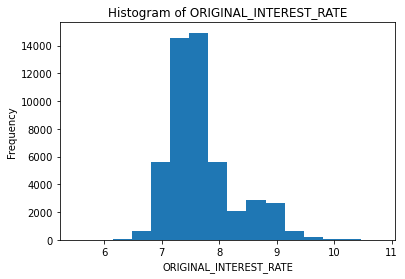

In [7]:
loan_level["ORIGINAL_INTEREST_RATE"].hist()

In [8]:
#> 学習/テストデータセットへの分割（学習 :  テスト = 80% : 20% ）
train, test = loan_level.split_frame([0.8], seed=42)
print("＜train/testのデータ数＞")
print("train:%d test:%d" % (train.nrows, test.nrows))

＜train/testのデータ数＞
train:39984 test:9946


これまでのチュートリアルと異なり、trainデータで交差検証(cross varidation)を実施し、ハイパーパラメータの決定を行う

***

<a id='AutoMLClassification'></a>
### H2O AutoML Classification

[**AutoML: Automatic Machine Learning - ドキュメント**](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)  
[**H2OAutoML - APIドキュメント**](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautomlh)

to do  
探索法（グリッドサーチ、ランダムサーチ）  
Modelの種類  
Stacked Ensemble

In [11]:
#> 利用変数の定義
y = "DELINQUENT"
ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"] 
x = list(set(train.names) - set(ignore))
x

['OCCUPANCY_STATUS',
 'ORIGINAL_LOAN_TERM',
 'POSTAL_CODE',
 'FIRST_PAYMENT_DATE',
 'METROPOLITAN_STATISTICAL_AREA',
 'CHANNEL',
 'SELLER_NAME',
 'NUMBER_OF_UNITS',
 'FIRST_TIME_HOMEBUYER_FLAG',
 'ORIGINAL_UPB',
 'MORTGAGE_INSURANCE_PERCENTAGE',
 'SERVICER_NAME',
 'NUMBER_OF_BORROWERS',
 'ORIGINAL_LOAN_TO_VALUE',
 'MATURITY_DATE',
 'LOAN_PURPOSE',
 'CREDIT_SCORE',
 'ORIGINAL_DEBT_TO_INCOME_RATIO',
 'PROPERTY_TYPE',
 'PROPERTY_STATE',
 'LOAN_SEQUENCE_NUMBER',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 'ORIGINAL_INTEREST_RATE']

In [13]:
aml = H2OAutoML(max_models=25, 
                max_runtime_secs_per_model=30, 
                seed=42, 
                project_name='classification', 
                balance_classes=True, 
                class_sampling_factors=[0.5,1.25])

停止基準に関する設定 - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#required-stopping-parameters)（以下いずれかに達すると、探索は終了する）
- max_models - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_models.html)（作成する最大モデル数）
- max_runtime_secs_per_model - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/max_runtime_secs.html)（1つのモデルに対する最大実行時間数）
- いずれも、最後に実施されるStacked Ensembleの処理に対しては非適用
  
不均衡データ(class inbalance)に対する対処（Classificationのみ）
- balance_classes - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/balance_classes.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2o.estimators.deeplearning.H2ODeepLearningEstimator.balance_classes)（Over Sampling/Under Samplingを実施する場合、"True"を指定）
- class_sampling_factors - [ドキュメント](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/class_sampling_factors.html)、[APIドキュメント](https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2o.estimators.deeplearning.H2ODeepLearningEstimator.class_sampling_factors)（Over Sampling/Under Samplingの比率。"DELINQUENT"はindex orderで、FALSE,TRUEと並んでおり、元の数に対し[0.5,1.25]倍する調整を実施(48118×0.5, 1812×1.25)）

In [20]:
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 19.9 s, sys: 530 ms, total: 20.4 s
Wall time: 8min 51s


validation_frameを設定しない場合（これまでのチュートリアルでは`model.train(x=x, y=y, training_frame=train, validation_frame=valid)`と設定していた）、k分割交差検証法が実施される

In [32]:
#> k分割交差検証法の分割数(k)
aml.nfolds

5

[Leaderboard](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#leaderboard)の表示  
k分割交差検証法による結果が表示（validation_frameを指定した場合はホールドアウト法の結果）

In [33]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200917_072926,0.853891,0.127097,0.227594,0.330937,0.177011,0.0313328
GLM_1_AutoML_20200917_072926,0.853804,0.120899,0.205971,0.336445,0.175755,0.0308898
StackedEnsemble_BestOfFamily_AutoML_20200917_072926,0.853607,0.127057,0.227922,0.328267,0.177039,0.0313427
GBM_grid__1_AutoML_20200917_072926_model_3,0.84761,0.12166,0.216049,0.321445,0.175271,0.03072
XGBoost_3_AutoML_20200917_072926,0.844995,0.122303,0.213597,0.334973,0.175688,0.0308663
GBM_1_AutoML_20200917_072926,0.841529,0.125747,0.185693,0.306544,0.17798,0.031677
XGBoost_grid__1_AutoML_20200917_072926_model_1,0.840382,0.124329,0.201126,0.350661,0.17673,0.0312336
GBM_3_AutoML_20200917_072926,0.839857,0.127721,0.199398,0.356579,0.17752,0.0315135
GBM_grid__1_AutoML_20200917_072926_model_2,0.837549,0.124473,0.202238,0.331704,0.176433,0.0311287
GBM_5_AutoML_20200917_072926,0.837053,0.12567,0.197568,0.35796,0.177011,0.0313329


個別のモデルを用い、[Stacked Ensembles](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/stacked-ensembles.html)した結果がトップとなっている

各モデルの計算時間を表示する場合  
"training_time_ms"はミリ秒での学習時間

In [34]:
from h2o.automl import get_leaderboard
lb2 = get_leaderboard(aml, extra_columns='ALL')
lb2.head(rows=lb2.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20200917_072926,0.853891,0.127097,0.227594,0.330937,0.177011,0.0313328,4268,0.249842
GLM_1_AutoML_20200917_072926,0.853804,0.120899,0.205971,0.336445,0.175755,0.0308898,6395,0.001319
StackedEnsemble_BestOfFamily_AutoML_20200917_072926,0.853607,0.127057,0.227922,0.328267,0.177039,0.0313427,1891,0.046126
GBM_grid__1_AutoML_20200917_072926_model_3,0.84761,0.12166,0.216049,0.321445,0.175271,0.03072,1771,0.013583
XGBoost_3_AutoML_20200917_072926,0.844995,0.122303,0.213597,0.334973,0.175688,0.0308663,1796,0.002026
GBM_1_AutoML_20200917_072926,0.841529,0.125747,0.185693,0.306544,0.17798,0.031677,1320,0.00867
XGBoost_grid__1_AutoML_20200917_072926_model_1,0.840382,0.124329,0.201126,0.350661,0.17673,0.0312336,2633,0.002577
GBM_3_AutoML_20200917_072926,0.839857,0.127721,0.199398,0.356579,0.17752,0.0315135,1453,0.009474
GBM_grid__1_AutoML_20200917_072926_model_2,0.837549,0.124473,0.202238,0.331704,0.176433,0.0311287,1567,0.009965
GBM_5_AutoML_20200917_072926,0.837053,0.12567,0.197568,0.35796,0.177011,0.0313329,1857,0.010977


In [41]:
aml.leaderboard['model_id'].as_data_frame()

[['model_id'],
 ['StackedEnsemble_AllModels_AutoML_20200917_072926'],
 ['GLM_1_AutoML_20200917_072926'],
 ['StackedEnsemble_BestOfFamily_AutoML_20200917_072926'],
 ['GBM_grid__1_AutoML_20200917_072926_model_3'],
 ['XGBoost_3_AutoML_20200917_072926'],
 ['GBM_1_AutoML_20200917_072926'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_1'],
 ['GBM_3_AutoML_20200917_072926'],
 ['GBM_grid__1_AutoML_20200917_072926_model_2'],
 ['GBM_5_AutoML_20200917_072926'],
 ['GBM_2_AutoML_20200917_072926'],
 ['GBM_grid__1_AutoML_20200917_072926_model_1'],
 ['DeepLearning_1_AutoML_20200917_072926'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_4'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_3'],
 ['GBM_4_AutoML_20200917_072926'],
 ['DeepLearning_grid__1_AutoML_20200917_072926_model_1'],
 ['XGBoost_1_AutoML_20200917_072926'],
 ['XGBoost_2_AutoML_20200917_072926'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_5'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_6'],
 ['DRF_1_AutoML_20200917_072926

In [46]:
aml.leaderboard['model_id'].as_data_frame()[1:]

[['StackedEnsemble_AllModels_AutoML_20200917_072926'],
 ['GLM_1_AutoML_20200917_072926'],
 ['StackedEnsemble_BestOfFamily_AutoML_20200917_072926'],
 ['GBM_grid__1_AutoML_20200917_072926_model_3'],
 ['XGBoost_3_AutoML_20200917_072926'],
 ['GBM_1_AutoML_20200917_072926'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_1'],
 ['GBM_3_AutoML_20200917_072926'],
 ['GBM_grid__1_AutoML_20200917_072926_model_2'],
 ['GBM_5_AutoML_20200917_072926'],
 ['GBM_2_AutoML_20200917_072926'],
 ['GBM_grid__1_AutoML_20200917_072926_model_1'],
 ['DeepLearning_1_AutoML_20200917_072926'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_4'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_3'],
 ['GBM_4_AutoML_20200917_072926'],
 ['DeepLearning_grid__1_AutoML_20200917_072926_model_1'],
 ['XGBoost_1_AutoML_20200917_072926'],
 ['XGBoost_2_AutoML_20200917_072926'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_5'],
 ['XGBoost_grid__1_AutoML_20200917_072926_model_6'],
 ['DRF_1_AutoML_20200917_072926'],
 ['GBM_grid

In [48]:
[mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid]

[]

In [47]:
# Get model ids for all models in the AutoML Leaderboard
#model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
model_ids = list(aml.leaderboard['model_id'].as_data_frame()[1:])

# Get the "All Models" Stacked Ensemble model
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid][0])
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_BestOfFamily" in mid][0])

# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner.coef()

H2OTypeError: Argument `model_id` should be a string, got list []

In [27]:
aml.training_info

{'creation_epoch': '1600295367',
 'start_epoch': '1600295367',
 'start_XGBoost_def_1': '1600295367',
 'start_XGBoost_def_2': '1600295387',
 'start_XGBoost_def_3': '1600295405',
 'start_GLM_def_1': '1600295418',
 'start_DRF_def_1': '1600295438',
 'start_GBM_def_1': '1600295462',
 'start_GBM_def_2': '1600295473',
 'start_GBM_def_3': '1600295485',
 'start_GBM_def_4': '1600295498',
 'start_GBM_def_5': '1600295511',
 'start_DeepLearning_def_1': '1600295526',
 'start_DRF_XRT': '1600295535',
 'start_XGBoost_grid_1': '1600295561',
 'start_GBM_grid_1': '1600295680',
 'start_DeepLearning_grid_1': '1600295731',
 'start_DeepLearning_grid_2': '1600295767',
 'start_DeepLearning_grid_3': '1600295831',
 'start_StackedEnsemble_best': '1600295890',
 'start_StackedEnsemble_all': '1600295892',
 'stop_epoch': '1600295897',
 'duration_secs': '530'}

In [30]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200917_072926,0.853891,0.127097,0.227594,0.330937,0.177011,0.0313328
GLM_1_AutoML_20200917_072926,0.853804,0.120899,0.205971,0.336445,0.175755,0.0308898
StackedEnsemble_BestOfFamily_AutoML_20200917_072926,0.853607,0.127057,0.227922,0.328267,0.177039,0.0313427
GBM_grid__1_AutoML_20200917_072926_model_3,0.84761,0.12166,0.216049,0.321445,0.175271,0.03072
XGBoost_3_AutoML_20200917_072926,0.844995,0.122303,0.213597,0.334973,0.175688,0.0308663
GBM_1_AutoML_20200917_072926,0.841529,0.125747,0.185693,0.306544,0.17798,0.031677
XGBoost_grid__1_AutoML_20200917_072926_model_1,0.840382,0.124329,0.201126,0.350661,0.17673,0.0312336
GBM_3_AutoML_20200917_072926,0.839857,0.127721,0.199398,0.356579,0.17752,0.0315135
GBM_grid__1_AutoML_20200917_072926_model_2,0.837549,0.124473,0.202238,0.331704,0.176433,0.0311287
GBM_5_AutoML_20200917_072926,0.837053,0.12567,0.197568,0.35796,0.177011,0.0313329
